In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.750,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0.0,0.0,250655,26.000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",female,40.0,0.0,0.0,31418,13.000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.525,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",female,NaN,2.0,0.0,367226,23.250,NaN,Q,16,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1009 non-null   float64
 1   survived   1009 non-null   float64
 2   name       1009 non-null   object 
 3   sex        1009 non-null   object 
 4   age        812 non-null    float64
 5   sibsp      1009 non-null   float64
 6   parch      1009 non-null   float64
 7   ticket     1009 non-null   object 
 8   fare       1008 non-null   float64
 9   cabin      229 non-null    object 
 10  embarked   1008 non-null   object 
 11  boat       374 non-null    object 
 12  body       98 non-null     float64
 13  home.dest  582 non-null    object 
dtypes: float64(7), object(7)
memory usage: 110.5+ KB


In [5]:
drop_columns = ['name', 'ticket', 'cabin', 'boat' , 'body', 'home.dest','embarked']


In [6]:
data_clean = data.drop(drop_columns, axis =1)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
data_clean['sex'] = le.fit_transform(data_clean['sex'])


In [9]:
data_clean.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,3.0,0.0,0,NaN,0.0,0.0,7.750
1,2.0,0.0,1,39.0,0.0,0.0,26.000
2,2.0,1.0,0,40.0,0.0,0.0,13.000
3,3.0,1.0,0,31.0,1.0,1.0,20.525
4,3.0,1.0,0,NaN,2.0,0.0,23.250


In [10]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1009 non-null   float64
 1   survived  1009 non-null   float64
 2   sex       1009 non-null   int32  
 3   age       812 non-null    float64
 4   sibsp     1009 non-null   float64
 5   parch     1009 non-null   float64
 6   fare      1008 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 51.4 KB


In [11]:
# can be done by imputer function from sklearn to fill the nan values
data_clean = data_clean.fillna(data_clean['age'].mean())

In [12]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1009 non-null   float64
 1   survived  1009 non-null   float64
 2   sex       1009 non-null   int32  
 3   age       1009 non-null   float64
 4   sibsp     1009 non-null   float64
 5   parch     1009 non-null   float64
 6   fare      1009 non-null   float64
dtypes: float64(6), int32(1)
memory usage: 51.4 KB


In [13]:
X = data_clean.drop(columns='survived')
Y = data_clean['survived']

In [14]:
X.head()

,pclass,sex,age,sibsp,parch,fare
0,3.0,0,29.838978,0.0,0.0,7.750
1,2.0,1,39.000000,0.0,0.0,26.000
2,2.0,0,40.000000,0.0,0.0,13.000
3,3.0,0,31.000000,1.0,1.0,20.525
4,3.0,0,29.838978,2.0,0.0,23.250


In [15]:
Y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: survived, dtype: float64

In [16]:
type(Y)

pandas.core.series.Series

In [17]:
type(X)

pandas.core.frame.DataFrame

In [18]:
# define entropy and infromation gain

def entropy(col):
    counts = np.unique(col, return_counts= True)
    N = float(col.shape[0])
    ent = 0.0
    
    for ix in counts[1]:
        p = ix/N
        ent += (-1.0 * p * np.log2(p))
    
    return ent
        

In [19]:
def divide_data(x_data, fkey, fval):
    # working with pandas dataframe
    x_right =[]
    x_left = []
    
    for ix in range(x_data.shape[0]):
        val = x_data[fkey].loc[ix]
        
        if val>fval:
            x_right.append(x_data.loc[ix])
        else:
            x_left.append(x_data.loc[ix])
    
    x_left = pd.DataFrame(x_left , columns= x_data.columns)
    x_right = pd.DataFrame(x_right, columns= x_data.columns)
    
    return x_left, x_right 

In [20]:
def information_gain(x_data, fkey, fval):
    
    left, right = divide_data(x_data, fkey, fval)
    
    l = float(left.shape[0])/x_data.shape[0]
    r = float(right.shape[0])/x_data.shape[0]
    
    # all examples come to one side!
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -10000000 #  min information gain
    
    i_gain = entropy(x_data.survived) - (l* entropy(left.survived)+ r*entropy(right.survived))
    
    return i_gain

In [21]:
for fx in X.columns:
    print(fx)
    print(information_gain(data_clean, fx, data_clean[fx].mean()))

pclass
0.055456910002982474
sex
0.19274737190850932
age
0.001955929827451075
sibsp
0.006492394392888956
parch
0.01975608012294816
fare
0.04242793401428169


In [22]:
class DecisionTree:
    
    #constructor
    def __init__(self, depth = 0 , max_depth = 5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
    
    def train(self, X_train):
        
        
        features = "pclass sex age sibsp parch fare".split(' ')
        info_gains = []
        
        for ix in features:
            
            i_gain = information_gain(X_train, ix, X_train[ix].mean())
            info_gains.append(i_gain)
                                
        
                            
        self.fkey = features[np.argmax(info_gains)]
        print('Making Tree feature is : ', self.fkey)                              
        self.fval = X_train[self.fkey].mean()
                                      
        data_left, data_right = divide_data(X_train, self.fkey, self.fval)
        data_left = data_left.reset_index(drop = True)
        data_right = data_right.reset_index(drop = True)
              
        # truely a left node
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            
            if X_train.survived.mean() >= 0.5:
                    self.target = 'survived'
            else:
                self.target = 'dead'
            return
                                      
        if(self.depth>= self.max_depth):
            
            if X_train.survived.mean() >= 0.5:
                self.target = 'survived'
            else:
                self.target = 'dead'
            return
        
        #recursive tree
        self.left = DecisionTree(depth= self.depth+1, max_depth= self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth= self.depth+1, max_depth= self.max_depth)
        self.right.train(data_right)
        
        #you can set the target at every node
        if X_train.survived.mean() >= 0.5:  
            self.target = 'survived'
        else:
            self.target = 'dead'

        return     
    
    def predict(self, test):
        if(test[self.fkey])>self.fval:
            #go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)
    
            
        
                                      

In [23]:
#Train-Validation-Test Set Split
split = int(0.7*data_clean.shape[0])
train_data = data_clean[:split]
test_data = data_clean[split:]
test_data = test_data.reset_index(drop= True)



In [24]:
print(test_data.shape, train_data.shape)

(303, 7) (706, 7)


In [25]:
dt = DecisionTree()

In [26]:
dt.train(train_data)

Making Tree feature is :  sex
Making Tree feature is :  pclass
Making Tree feature is :  parch
Making Tree feature is :  fare
Making Tree feature is :  fare
Making Tree feature is :  fare
Making Tree feature is :  fare
Making Tree feature is :  age
Making Tree feature is :  age
Making Tree feature is :  age
Making Tree feature is :  fare
Making Tree feature is :  pclass
Making Tree feature is :  age
Making Tree feature is :  age
Making Tree feature is :  age
Making Tree feature is :  age
Making Tree feature is :  age
Making Tree feature is :  sibsp
Making Tree feature is :  fare
Making Tree feature is :  fare
Making Tree feature is :  parch
Making Tree feature is :  age
Making Tree feature is :  age
Making Tree feature is :  age
Making Tree feature is :  parch
Making Tree feature is :  fare
Making Tree feature is :  parch
Making Tree feature is :  age
Making Tree feature is :  fare
Making Tree feature is :  fare
Making Tree feature is :  age
Making Tree feature is :  age
Making Tree fe

In [27]:
print(dt.fkey)

sex


In [28]:
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [29]:
y_pred

['dead',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'dead',
 'dead',
 'dead',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'survived',
 'dead',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'survived',
 'dead',
 'survived',
 'survived',
 'dead',
 'survived',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'dead',
 'dead',
 'dead',
 'survived',
 'survived',
 'dead',
 'dead',
 'survived',
 'survived',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'survived',
 'survived',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'dead',
 'surv

In [30]:
y_actual = test_data['survived']

In [31]:
print(y_actual)

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
298    1.0
299    0.0
300    1.0
301    1.0
302    0.0
Name: survived, Length: 303, dtype: float64


In [32]:
le = LabelEncoder()
y_pred = le.fit_transform(y_pred)


In [33]:
print(y_pred)

[0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0
 1 0 0 0 1 0 0]


In [34]:
print(y_pred.shape)

(303,)


In [35]:
print(y_actual.shape)

(303,)


In [36]:
type(y_actual)

pandas.core.series.Series

In [37]:
type(y_pred)

numpy.ndarray

In [38]:
acc = np.sum(y_pred == np.array(y_actual))/y_pred.shape[0]

In [39]:
print(acc)

0.7557755775577558


In [40]:
# Decision Tree using Sklrearn


In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
sk_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth=5)

In [43]:
sk_tree.fit(train_data.drop(columns='survived'), train_data['survived'])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [44]:
sk_tree.predict(test_data.drop(columns= 'survived'))

array([0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1.

In [45]:
sk_tree.score(test_data.drop(columns='survived'), test_data['survived'])

0.7755775577557755

# Visualising the decision tree

In [46]:
!pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
!pip install Ipython

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
!pip install six

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
import pydotplus

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [50]:
dot_data = StringIO()

In [51]:
export_graphviz(sk_tree, out_file= dot_data, filled= True, rounded= True)

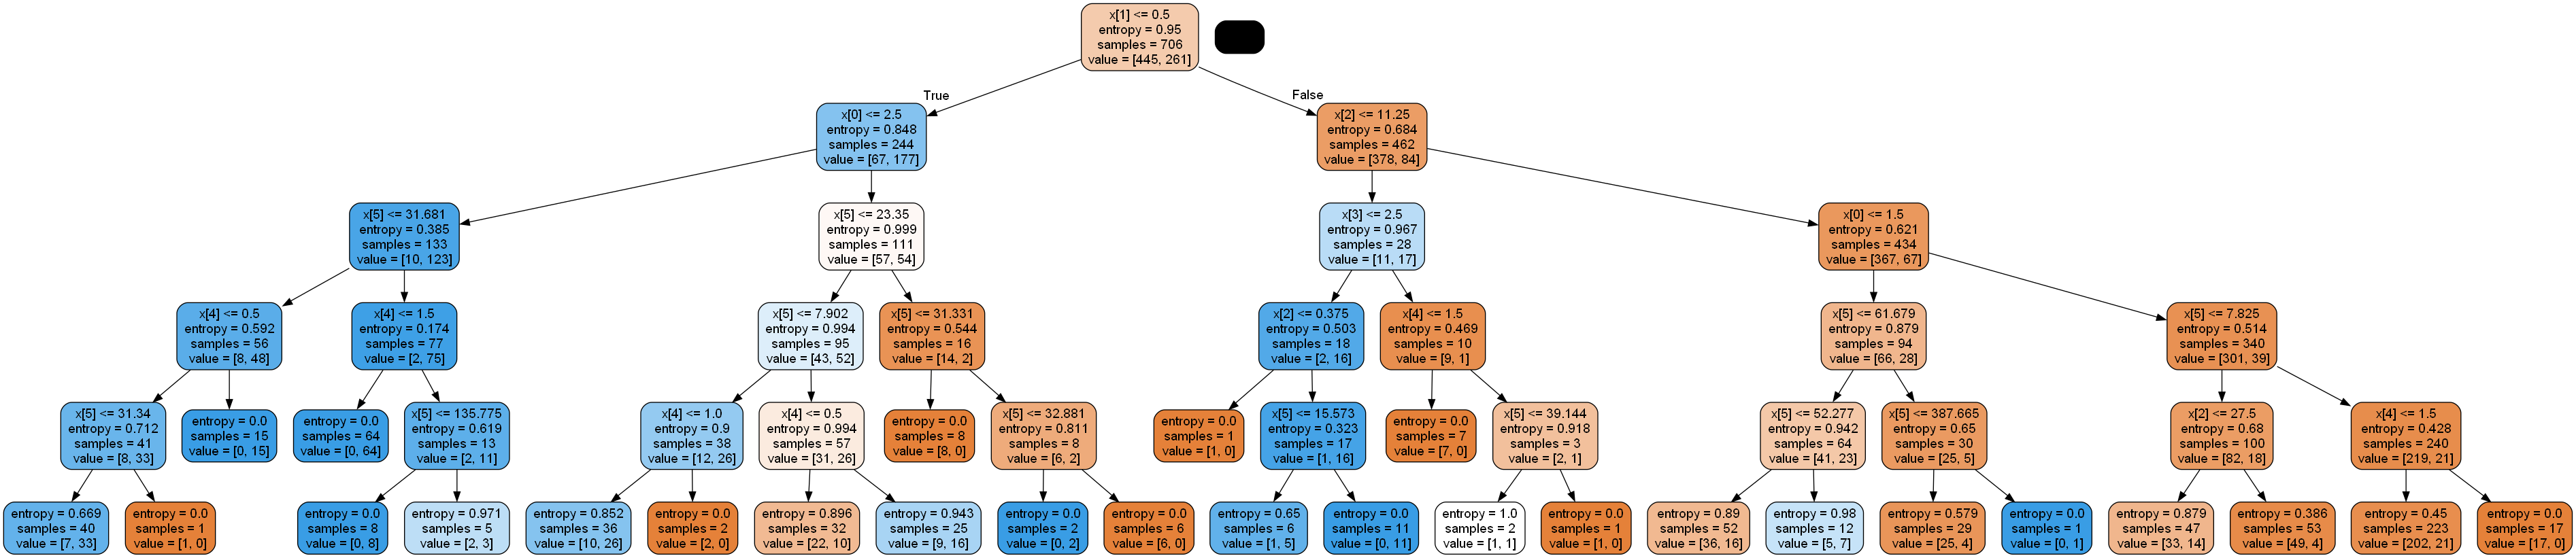

In [52]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Problems 
- overfitting
- High Variance

# Overfitting can be seen as follows

In [55]:
xtrain = train_data.drop(columns= 'survived')
ytrain = train_data['survived'].values
xtest = test_data.drop(columns='survived')
ytest = test_data['survived'].values

In [56]:
sk_tree.score(xtest, ytest)

0.7755775577557755

In [57]:
sk_tree.score(xtrain,ytrain)

0.8526912181303116

In [58]:
# if we don't restrict depth
sk_tree = DecisionTreeClassifier(criterion='entropy')
sk_tree.fit(xtrain,ytrain)
sk_tree.score(xtrain,ytrain)

0.9773371104815864

In [59]:
sk_tree.score(xtest, ytest)

0.7557755775577558

# Random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
from sklearn.model_selection import cross_val_score

In [104]:
rf = RandomForestClassifier(n_estimators= 10, criterion= 'entropy', max_depth= 4)

In [105]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=10)

In [106]:
rf.score(xtrain, ytrain)

0.8243626062322946

In [107]:
# again overfitting if we don't specify depth
rf.score(xtest, ytest)

0.7755775577557755

### cross validation method to have better accuracy

In [136]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(RandomForestClassifier(n_estimators=30, max_depth= 5, criterion= 'entropy'), xtrain, ytrain, cv = 5 ).mean()

In [137]:
print(acc)

0.821576266107282


In [140]:
acc_list =[]
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i, max_depth= 5, criterion= 'entropy'), xtrain, ytrain, cv = 5 ).mean()
    acc_list.append(acc)



In [141]:
print(acc_list)

[0.7367096194186394, 0.7677754470082909, 0.80175806612726, 0.8045749675357108, 0.8045549895115374, 0.8130656278094097, 0.803176505843572, 0.8031165717710518, 0.7918090100889021, 0.8003196483867745, 0.8045949455598841, 0.810208770352612, 0.8159124962541204, 0.8088103086604737, 0.814474078513635, 0.8201278593547098, 0.8031665168314854, 0.8088103086604734, 0.8102487264009589, 0.8244031565278196, 0.7989111976825493, 0.8073918689441614, 0.8130656278094095, 0.8173109579462592, 0.8201278593547098, 0.805983418239936, 0.8159124962541204, 0.8130756168214963, 0.8201378483667966, 0.8116471880930975, 0.8130656278094097, 0.8159025072420338, 0.8173109579462592, 0.8173009689341724, 0.8088103086604734, 0.8130556387973229, 0.8102087703526122, 0.8144940565378084, 0.8145040455498951, 0.8173209469583458, 0.8173209469583458, 0.821576266107282, 0.8017480771151734, 0.811667166117271, 0.8130556387973229, 0.8173009689341724, 0.8159025072420336, 0.814474078513635, 0.8159025072420338]


C:\Users\Dell\AppData\Local\Temp\ipykernel_660\3257598784.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


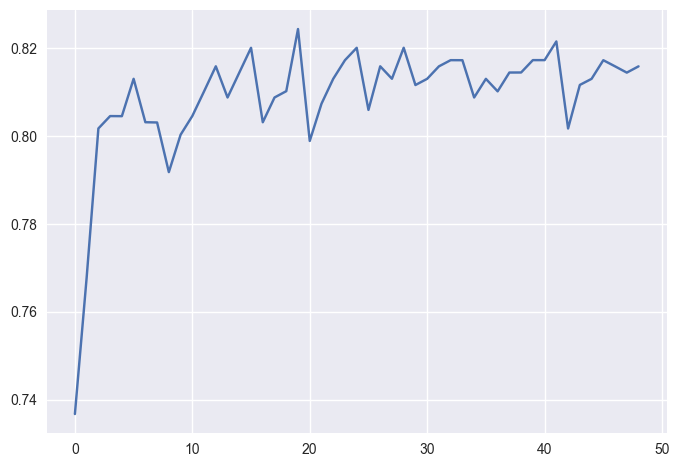

In [142]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(acc_list)
plt.show()

In [143]:
print(np.argmax(acc_list))

19


In [147]:
rf = RandomForestClassifier(n_estimators= 19, max_depth= 5 , criterion= 'entropy')
rf.fit(xtrain,ytrain)


RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=19)

In [148]:
rf.score(xtrain,ytrain)

0.8555240793201133

In [149]:
rf.score(xtest,ytest)

0.801980198019802

In [150]:
y_pred = rf.predict(xtest)

In [151]:
y_pred

array([0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 1.